从`all_sis_combination.csv`中提取数据，并获得对应的序列，保存为`total_data.csv`

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import os.path as osp

In [4]:
def load_fasta(fasta_path: str, return_header=False):
    header_list = []
    seq_list = []
    with open(fasta_path, "r") as f:
        while True:
            line = f.readline().strip()
            if line and line.startswith(">"):
                header_list.append(line)
            elif line:
                seq_list.append(line)
            else:
                break
    if return_header:
        return header_list, seq_list
    else:
        return seq_list


In [5]:
data_df = pd.read_csv("../data/all_sis_combination.csv", sep =",")
fasta_path = "/p300s/wangmx_group/xutingfeng/SIS/data/fasta/single"
data = [] 

for idx, v in data_df.iterrows():
    # print(v.values)
    SLF, SRnase, label = v.values
    
    data.append({"SLF": SLF, "SLF_Seq":load_fasta(osp.join(fasta_path, SLF+".fasta"))[0], "SRnase":SRnase, "SRnase_Seq":load_fasta(osp.join(fasta_path, SRnase+".fasta"))[0],"label":label})


In [26]:
# pd.DataFrame(data).to_csv("/p300s/wangmx_group/xutingfeng/SIS/data/total_data.csv", sep = ",", index=False)

In [6]:
test = pd.DataFrame(data)

In [25]:
[dict(v) for idx, v in test.iterrows()]

[{'SLF': 'S5-SLF1',
  'SLF_Seq': 'MANGILKKLPEDLVFLILLTFPVKSLLRLKCISKAWSILIQSTTFINRHINRKTNTKAEFILFKRSIKDEEEEFINILSFFSGHDDVLNPLFPDIDVSYMTSKCDCSFNPLIGPCDGLIALTDTIITIVLNPATRNFRVLPPSPFGCPKGYHRSVEGVGFGFDTISNYYKVVRISEVYCEEADGYPGPKDSKIDVCDLSTDSWRELDHVQLPSIYWVPCAGMLYKEMVHWFATTDTSMVILCFDMSTEMFHDMKMPDTCSRITHELYYGLVVLCESFTLIGYSNPISSIDPVEDKMHIWVMMEYGVSESWIMKYTIRPLSIESPLAVWKNHILLLQSRSGLLISYDLNSGEAKELNLHGFPDTLSVKVYKECLTSIPKGSEYSTKVQKF',
  'SRnase': 'S17-RNase',
  'SRnase_Seq': 'MFKSQLTSAHFILLFAISPIYGDFDYMQLVLTWPATFCYPKGFCQRIPPKNFTIHGLWPDKERQRLQFCAKDYKYVNFEGDIKSSLDHHWIQLRFNKEVGLKYQPLWHDQYKKHGTCCSNLYDQTAYFLLAMRLKNKFDLLGTLRTNGITPGRRYTFQRIHGAIKTVTQMDPDLKCVEHIKGVLELNEIGICFTPNAESPYHCPQSHSCEKRGYTGILFR',
  'label': 1},
 {'SLF': 'S5-SLF1',
  'SLF_Seq': 'MANGILKKLPEDLVFLILLTFPVKSLLRLKCISKAWSILIQSTTFINRHINRKTNTKAEFILFKRSIKDEEEEFINILSFFSGHDDVLNPLFPDIDVSYMTSKCDCSFNPLIGPCDGLIALTDTIITIVLNPATRNFRVLPPSPFGCPKGYHRSVEGVGFGFDTISNYYKVVRISEVYCEEADGYPGPKDSKIDVCDLSTDSWRELDHVQLPSIYWVPCAGMLYKEMVHWFATTDTSMVILCFDMSTEMFHDMKMPDTCS

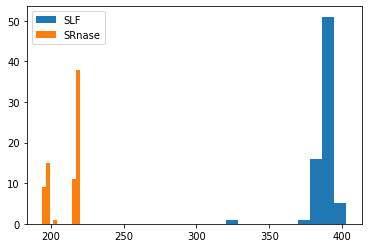

In [15]:
import matplotlib.pyplot as plt

y1 = list(map(lambda x: len(x), test["SLF_Seq"].to_list() ))

y2 = list(map(lambda x: len(x), test["SRnase_Seq"].to_list() ))

plt.hist(y1, label="SLF")
plt.hist(y2, label="SRnase")

plt.legend()